In [ ]:
#importing libraries

import numpy as np
import pandas as pd

In [ ]:
#reading the dataset

data_set=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [ ]:
data_set.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [ ]:
#checking the shape of the dataframe
data_set.shape

(907, 27)

#DATA CLEANING

In [ ]:
#checking the null values

data_set.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [ ]:
#dropping the columns with all null values

df=data_set.dropna(how='all',axis=1)

In [ ]:
df.shape

(907, 22)

In [ ]:
#checking the datypes of the columns
df.dtypes

country                    object
country_long               object
name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
other_fuel1                object
other_fuel2                object
commissioning_year        float64
owner                      object
source                     object
url                        object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source     object
dtype: object

In [ ]:
#checking unique values in the columns with null values

df.latitude.value_counts()

19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    1
17.2970    1
20.8772    1
9.9344     1
Name: latitude, Length: 836, dtype: int64

In [ ]:
df.longitude.value_counts()

71.6917    4
75.8988    3
71.6918    3
72.8983    3
81.2875    3
          ..
70.3961    1
74.2393    1
77.0435    1
73.8254    1
77.4768    1
Name: longitude, Length: 827, dtype: int64

In [ ]:
df.other_fuel1.value_counts()

Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [ ]:
df.other_fuel2.value_counts()

Oil    1
Name: other_fuel2, dtype: int64

In [ ]:
df.commissioning_year.value_counts()

2015.0    28
2013.0    25
2012.0    23
2016.0    19
2010.0    18
          ..
1946.0     1
1956.0     1
1937.0     1
1949.0     1
1953.0     1
Name: commissioning_year, Length: 73, dtype: int64

In [ ]:
df.owner.value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

In [ ]:
df.source.value_counts()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

In [ ]:
df.geolocation_source.value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [ ]:
df.generation_data_source.value_counts()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

In [ ]:
df.generation_data_source.unique()

array([nan, 'Central Electricity Authority'], dtype=object)

**Filling nan values in categorical data**

In [ ]:
#filling teh owner column with govt because nan values have source Central Govt. Authority 

df['owner']=df['owner'].replace(np.NaN,'Govt')

<ipython-input-19-22cf43100ec7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['owner']=df['owner'].replace(np.NaN,'Govt')


In [ ]:
df.owner.value_counts()

Govt                                                           565
Jk Cement ltd                                                    4
Acc Acc ltd                                                      4
Sterling Agro Industries ltd.                                    4
Maharashtra State Power Generation Co Ltd (MAHAGENCO)            3
                                                              ... 
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Energy Infratech Private Limited                                 1
K. N. Ram                                                        1
iEnergy Wind Farms                                               1
Name: owner, Length: 281, dtype: int64

In [ ]:
#filling nan values with the mode of geolocation_source

df['geolocation_source']=df['geolocation_source'].replace(np.NaN,'WRI')

<ipython-input-21-38aa57c8ed8f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['geolocation_source']=df['geolocation_source'].replace(np.NaN,'WRI')


In [ ]:

df.geolocation_source.value_counts()

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

In [ ]:
#replacing  nan values of other fuel with other as we do not type of fuel used 

df['other_fuel1']=df['other_fuel1'].replace(np.NaN,'Other')

<ipython-input-23-00bf2f2a7b0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['other_fuel1']=df['other_fuel1'].replace(np.NaN,'Other')


In [ ]:
df['generation_data_source']=df['generation_data_source'].replace(np.NaN,'others')

<ipython-input-24-94ccf222fdc0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['generation_data_source']=df['generation_data_source'].replace(np.NaN,'others')


In [ ]:
df.generation_data_source.value_counts()

others                           458
Central Electricity Authority    449
Name: generation_data_source, dtype: int64

In [ ]:
#fillong nan values with 2019 as the data is extracted in 2019

df['year_of_capacity_data']=df['year_of_capacity_data'].replace(np.NaN,2019)

<ipython-input-26-7d9b40d9a5ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_of_capacity_data']=df['year_of_capacity_data'].replace(np.NaN,2019)


In [ ]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1                 0
other_fuel2               906
commissioning_year        380
owner                       0
source                      0
url                         0
geolocation_source          0
year_of_capacity_data       0
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source      0
dtype: int64

In [ ]:
#dropping  categorical columns as they most of the null values
#drooping url and country long column as it has zero contribution in dat

df=df.drop(['other_fuel2','url','country_long'],axis=1)

In [ ]:
df.shape

(907, 19)

**Filling nan values of numerical data**

In [ ]:
#filling null values of numerical data columns with zero

df=df.fillna(0)

In [ ]:
df.isnull().sum()

country                   0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

#DATA VISUALISATION & PRE-PROCESSING

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

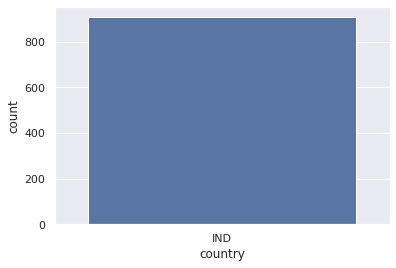

In [ ]:

sns.set()
sns.countplot(x='country',data=df)

The data is of one country that is India

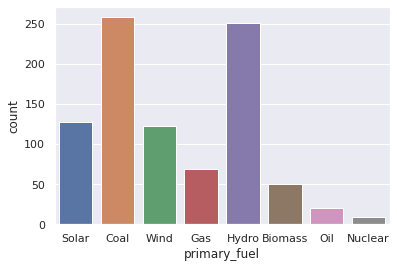

In [ ]:
sns.set()
sns.countplot(x='primary_fuel',data=df)

There are 8 types of primary_fuel used.

Coal is the fuel which used maximum whereas nuclear is the least used primary fuel.

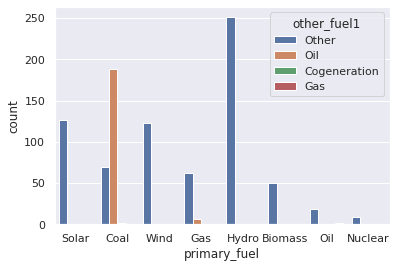

In [ ]:
sns.set()
sns.countplot(x='primary_fuel',hue='other_fuel1',data=df)

oil is the most common other_fuel 1 with coal.

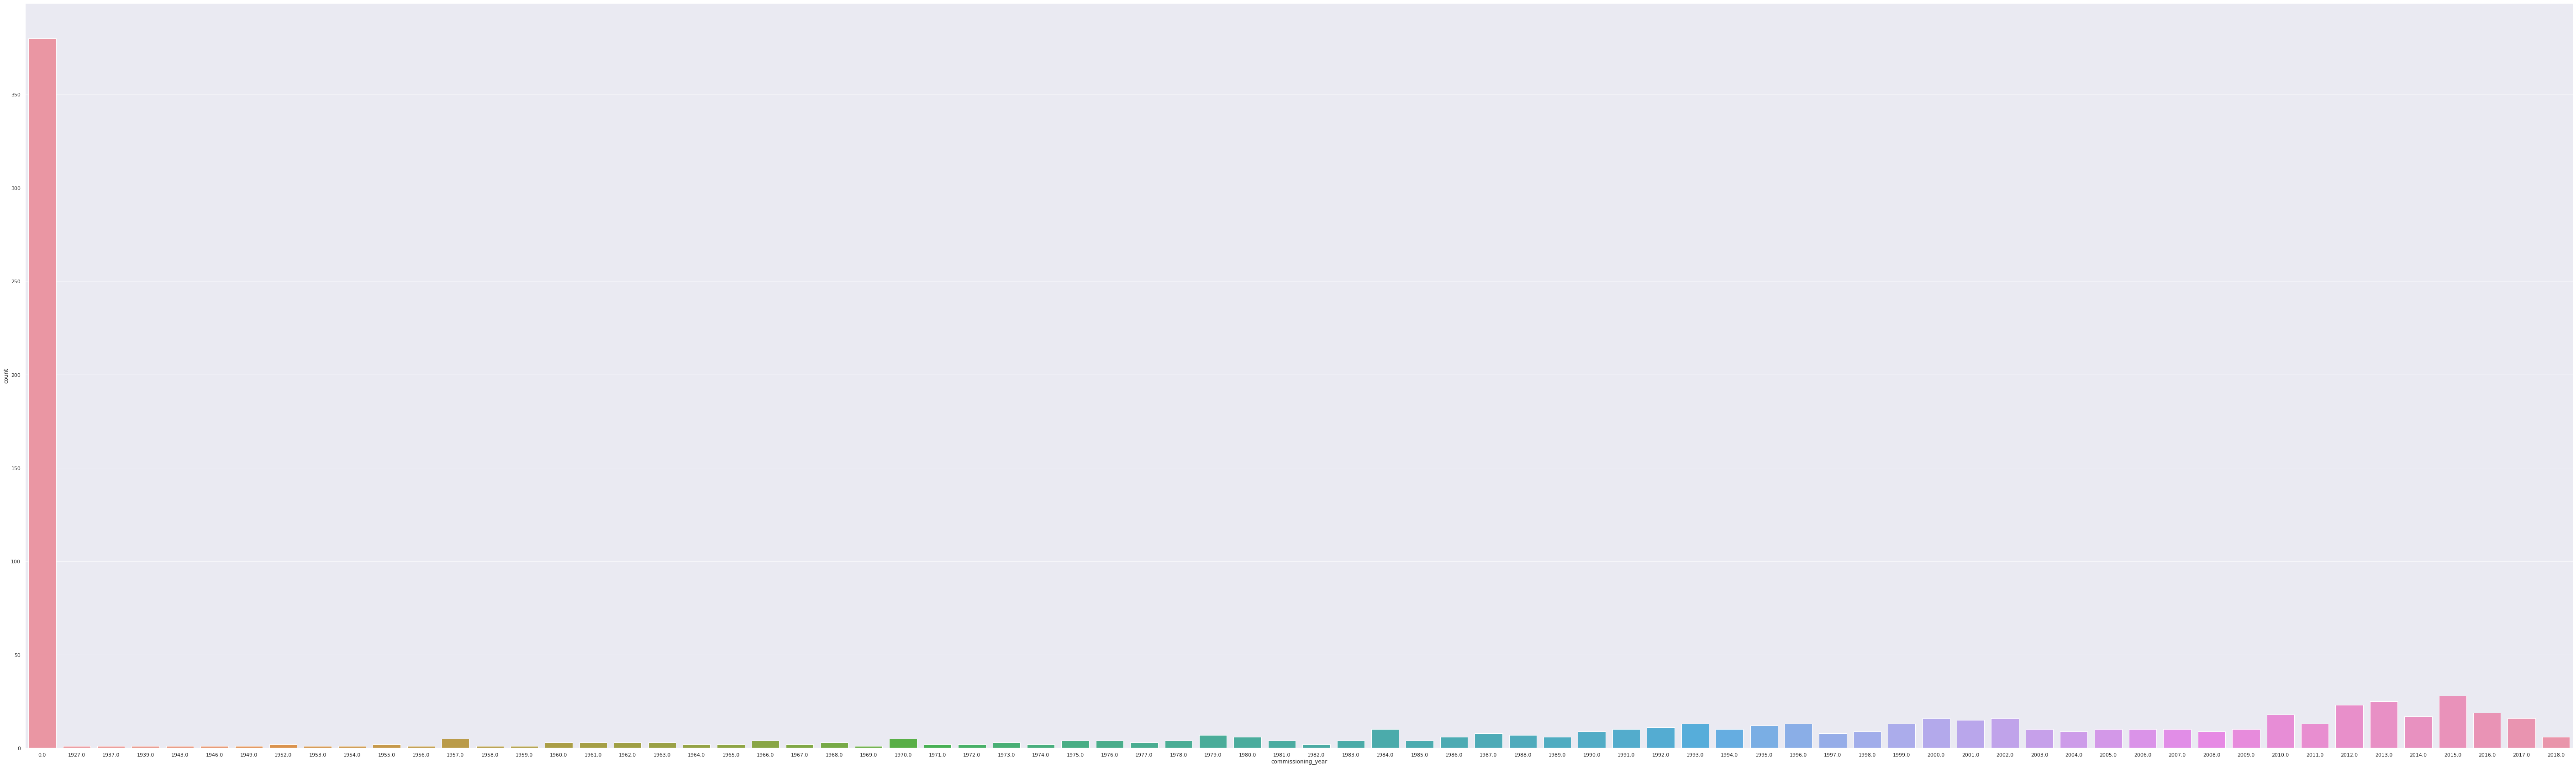

In [ ]:
plt.figure(figsize=(100,30))
sns.set()
sns.countplot(x='commissioning_year',data=df)

The power plant are commisioned mostly between 2000-2018

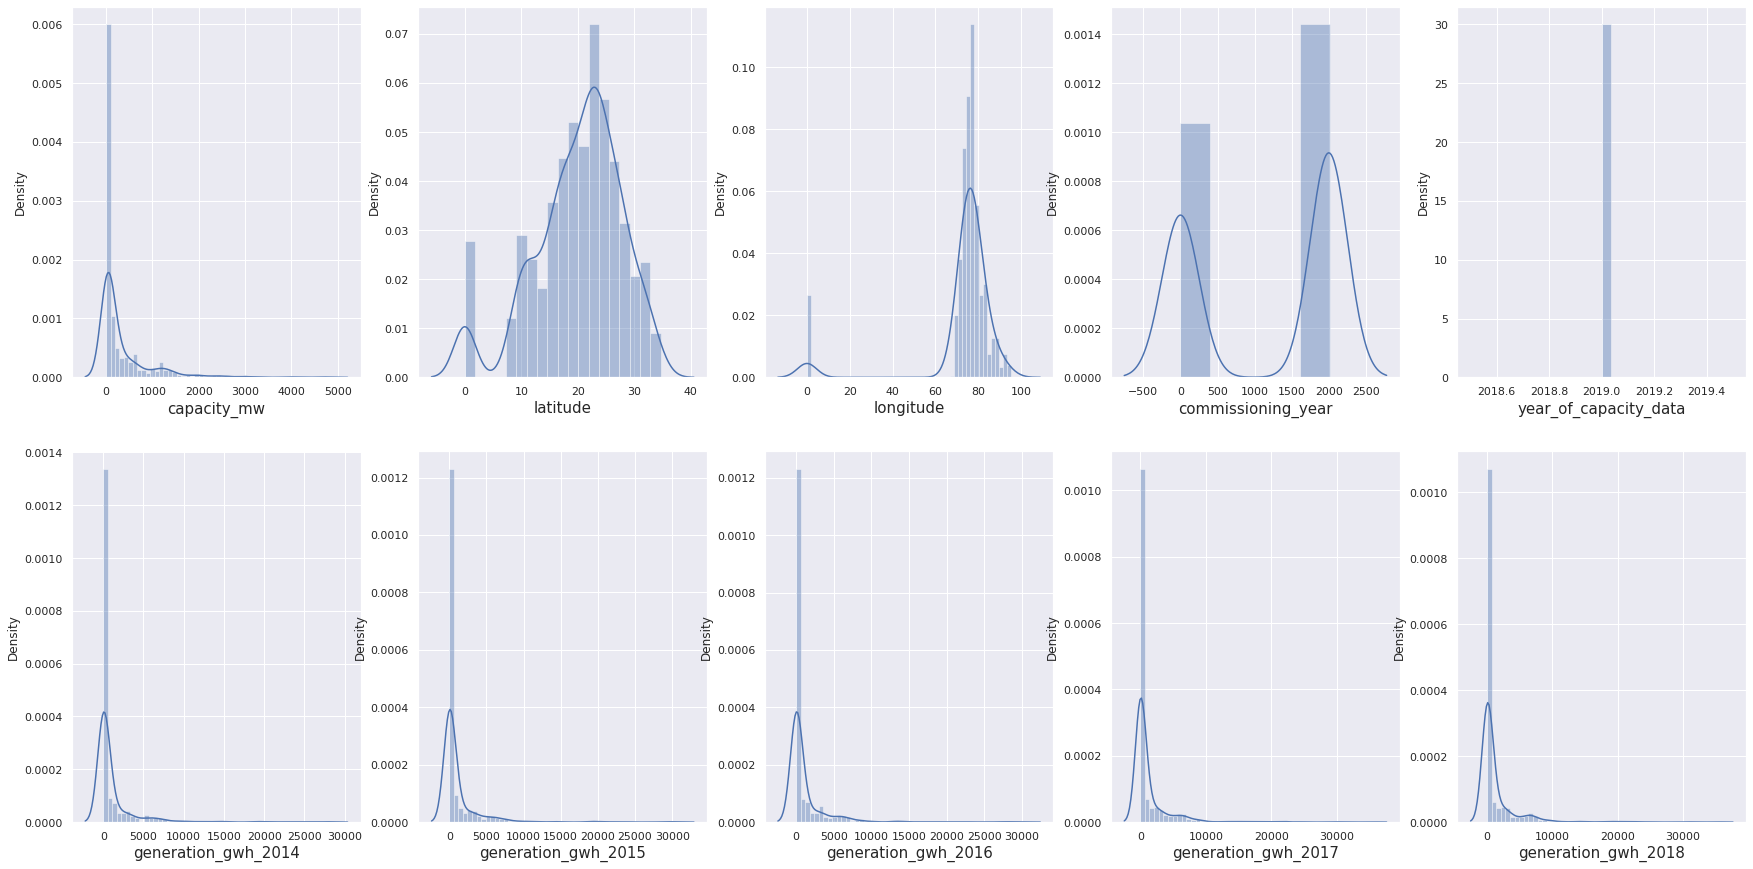

In [ ]:
#visualisation of continuous data

plt.figure(figsize=(30,15))
plotnumber=1

for column in df[['capacity_mw','latitude','longitude','commissioning_year','year_of_capacity_data','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]:
  if plotnumber <= 10:
    ax=plt.subplot(2,5,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=15)

    plotnumber +=1

plt.show()

Capacity_mw has left skweness and most of the data points are close to 0.

latitude and longitude have almost normal distribution, outliers at 0 as nan values were filled with 0.

Most of the plants were commisioned around the year 2000 or so. 0 has data points as there were nan values.

All generation_gwh are left skewed due to nan values which were filled with 0.

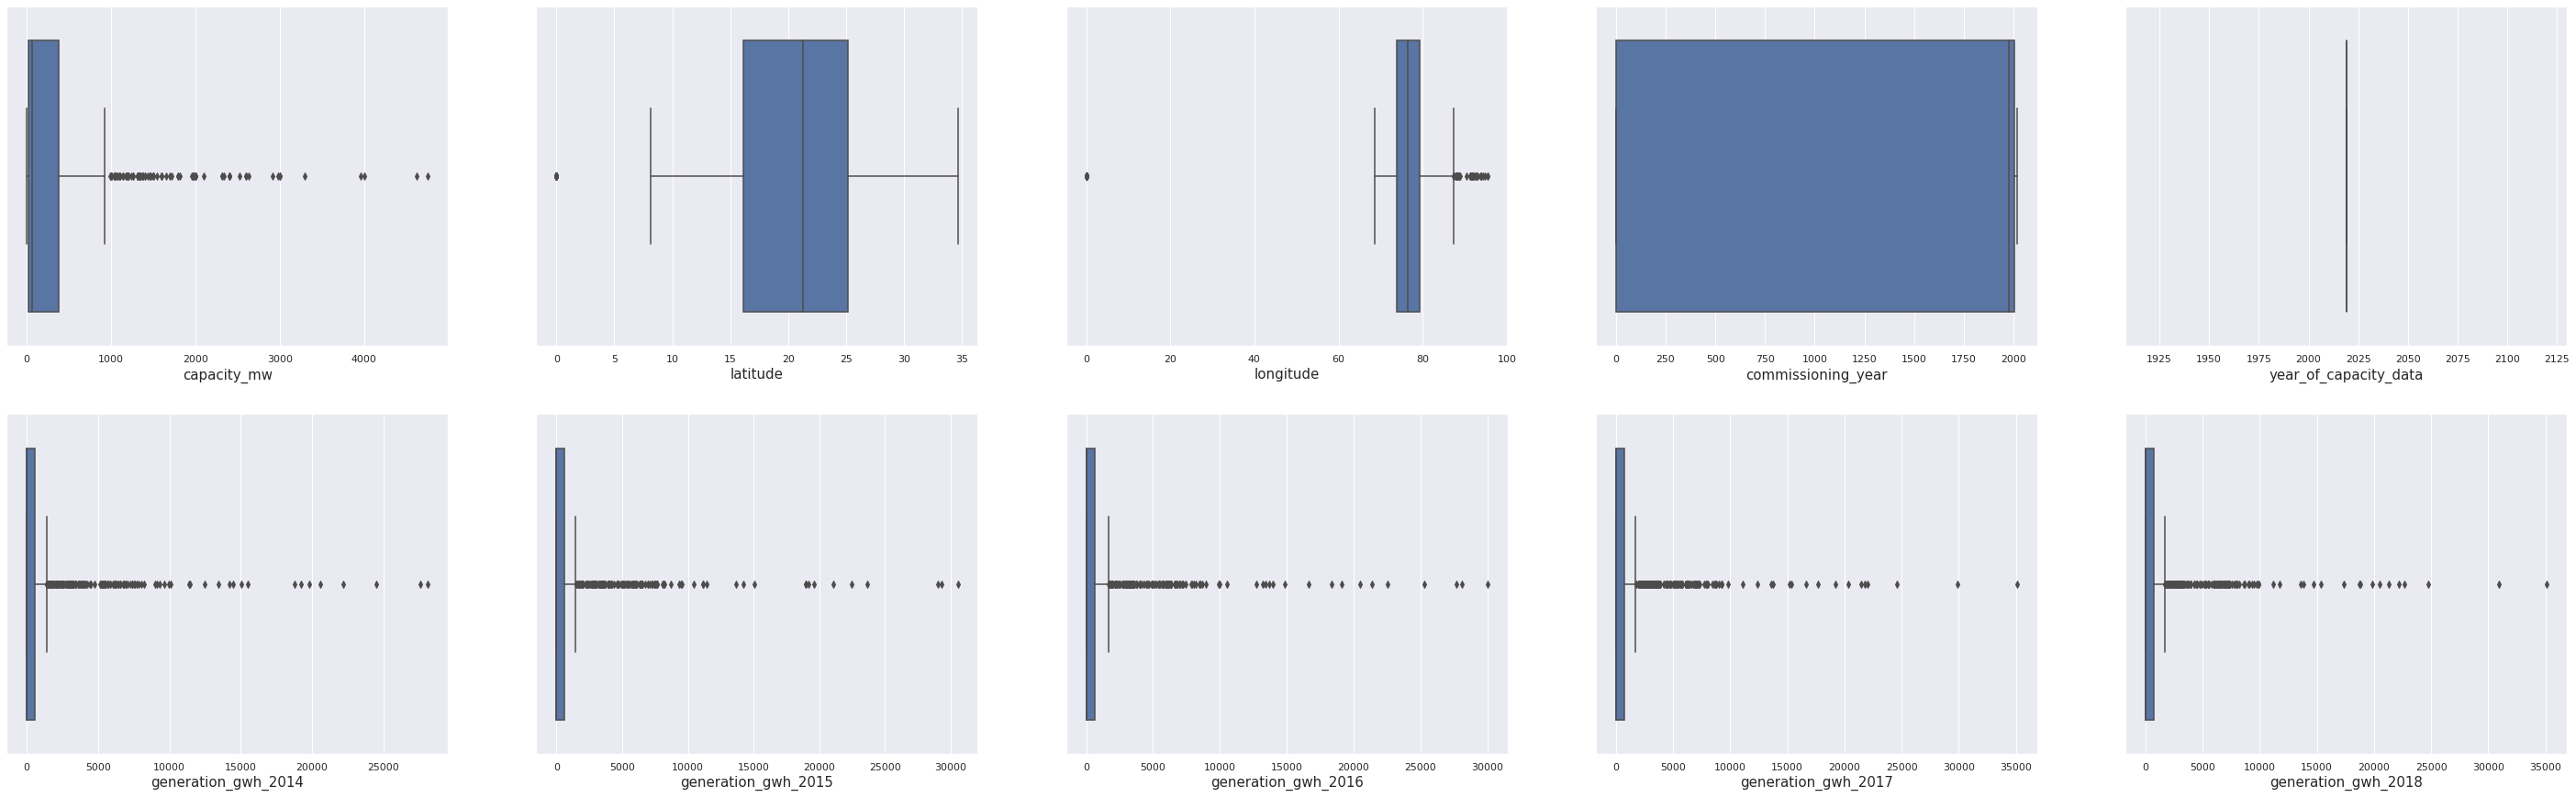

In [ ]:
#plotting of bocplot graph to check the outliers

plt.figure(figsize=(50,15))
plotnumber=1

for column in df[['capacity_mw','latitude','longitude','commissioning_year','year_of_capacity_data','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]:
  if plotnumber <= 10:
    ax=plt.subplot(2,5,plotnumber)
    sns.boxplot(df[column])
    plt.xlabel(column,fontsize=15)

    plotnumber +=1

plt.show()

The above plot shows the outliers due to nan values

In [ ]:
#statistics of the data

df.describe()



,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.0,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,20.122831,73.536147,1160.382580,2019.0,1067.106713,1129.781446,1180.909147,1235.958207,1284.630911
std,590.085456,7.655960,17.674358,985.973139,0.0,2926.078576,3105.552487,3131.100641,3187.208175,3298.251107
min,0.000000,0.000000,0.000000,0.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.172050,73.811550,0.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.200000,21.281800,76.493800,1978.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,385.250000,25.176450,79.206100,2003.000000,2019.0,556.562750,598.926350,670.039394,709.290725,687.754000
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


Minimum values of all features is 0 due to nan values.

generation_gwh features standard deviation is more than mean, hence there are discrepencies.

Commission year- all the plants are set up between 1978 to 2018.

Year_of_capacity data shows that data is collected in the year 2019.

longitude and latitude data is evenly distributed except nan values whic were filled with 0.

**Removing outliers**

In [ ]:
#removing outliers

q1=df.quantile(0.25)

q3=df.quantile(0.75)

iqr=q3-q1

In [ ]:
#validating outlier
capacitymw_high=(q3.capacity_mw + (1.5 * iqr.capacity_mw ))
print(capacitymw_high)


#checking the indexes with higher values
index=np.where(df['capacity_mw']>capacitymw_high)
print(index)

#dropping the index which have high values
df=df.drop(df.index[index])
df.shape

#reseting the data after dropping outliers
df.reset_index()

938.0374999999999
(array([  4,  10,  12,  15,  18,  44,  57,  61,  75,  78,  93, 143, 147,
       158, 162, 166, 167, 168, 189, 209, 279, 280, 281, 288, 297, 308,
       310, 315, 319, 324, 334, 350, 352, 359, 363, 364, 366, 368, 373,
       375, 378, 390, 391, 414, 417, 448, 449, 455, 468, 471, 472, 473,
       482, 493, 494, 525, 526, 532, 535, 544, 559, 565, 578, 579, 594,
       597, 618, 622, 623, 625, 626, 630, 632, 644, 645, 648, 654, 657,
       676, 678, 682, 691, 695, 697, 700, 707, 721, 723, 724, 726, 729,
       740, 743, 767, 786, 787, 788, 792, 799, 800, 808, 820, 821, 841,
       842, 845, 849, 867, 876, 880, 883, 889, 902]),)


,index,country,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,IND,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Other,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2019.0,0.000000,0.000,0.000000,0.0000,0.000000,others
1,1,IND,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Other,0.0,Ultratech Cement ltd,Ultratech Cement ltd,WRI,2019.0,0.000000,0.000,0.000000,0.0000,0.000000,others
2,2,IND,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Other,0.0,AES,CDM,WRI,2019.0,0.000000,0.000,0.000000,0.0000,0.000000,others
3,3,IND,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Other,2004.0,Govt,Central Electricity Authority,WRI,2019.0,617.789264,843.747,886.004428,663.7745,626.239128,Central Electricity Authority
4,5,IND,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,Oil,2005.0,Govt,Central Electricity Authority,WRI,2019.0,1153.421000,1208.852,1175.765000,1147.9130,976.655000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,901,IND,YELHANKA (DG),IND0000512,106.6,13.1156,77.5838,Oil,Other,1993.0,Govt,Central Electricity Authority,WRI,2019.0,0.000000,0.000,0.000000,0.0000,0.000000,Central Electricity Authority
790,903,IND,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,Other,0.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,2019.0,0.000000,0.000,0.000000,0.0000,0.000000,others
791,904,IND,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,Other,0.0,Govt,CDM,WRI,2019.0,0.000000,0.000,0.000000,0.0000,0.000000,others
792,905,IND,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,Other,0.0,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,2019.0,0.000000,0.000,0.000000,0.0000,0.000000,others


In [ ]:
#validating outlier
longitude_high=(q3.longitude + (1.5 * iqr.longitude ))
print(longitude_high)


#checking the indexes with higher values
index=np.where(df['longitude']>longitude_high)
print(index)

#dropping the index which have high values
df=df.drop(df.index[index])
df.shape

#reseting the data after dropping outliers
df.reset_index()

87.29792499999996
(array([  3,  44,  51,  92,  96, 138, 144, 159, 161, 165, 219, 224, 233,
       258, 264, 272, 294, 303, 309, 326, 347, 372, 382, 428, 444, 464,
       472, 486, 505, 515, 563, 565, 566, 576, 642, 695, 697, 698, 699,
       700, 708, 717, 737, 741, 742]),)


,index,country,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,IND,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Other,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others
1,1,IND,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Other,0.0,Ultratech Cement ltd,Ultratech Cement ltd,WRI,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others
2,2,IND,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Other,0.0,AES,CDM,WRI,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others
3,5,IND,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,Oil,2005.0,Govt,Central Electricity Authority,WRI,2019.0,1153.42100,1208.8520,1175.76500,1147.9130,976.65500,Central Electricity Authority
4,6,IND,ALIYAR,IND0000004,60.0,10.4547,77.0078,Hydro,Other,1970.0,Govt,Central Electricity Authority,WRI,2019.0,157.55825,152.1952,61.42135,89.6296,48.32715,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,901,IND,YELHANKA (DG),IND0000512,106.6,13.1156,77.5838,Oil,Other,1993.0,Govt,Central Electricity Authority,WRI,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,Central Electricity Authority
745,903,IND,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,Other,0.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others
746,904,IND,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,Other,0.0,Govt,CDM,WRI,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others
747,905,IND,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,Other,0.0,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others


In [ ]:
#validating outlier
generation_gwh_2014_high=(q3.generation_gwh_2014 + (1.5 * iqr.generation_gwh_2014 ))
print(generation_gwh_2014_high)


#checking the indexes with higher values
index=np.where(df['generation_gwh_2014']>generation_gwh_2014_high)
print(index)

#dropping the index which have high values
df=df.drop(df.index[index])
df.shape

#reseting the data after dropping outliers
df.reset_index()

1391.4068750000001
(array([  7,  11,  16,  33,  35,  76,  82,  88,  94, 118, 119, 126, 138,
       146, 158, 180, 188, 190, 199, 203, 235, 238, 241, 256, 267, 269,
       270, 280, 286, 309, 317, 320, 327, 375, 379, 399, 401, 430, 442,
       446, 447, 449, 457, 480, 483, 488, 500, 504, 535, 543, 567, 577,
       601, 610, 612, 615, 656, 658, 661, 668, 669, 670, 674, 700, 704,
       706, 723, 727, 742]),)


,index,country,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,IND,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Other,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others
1,1,IND,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Other,0.0,Ultratech Cement ltd,Ultratech Cement ltd,WRI,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others
2,2,IND,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Other,0.0,AES,CDM,WRI,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others
3,5,IND,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,Oil,2005.0,Govt,Central Electricity Authority,WRI,2019.0,1153.42100,1208.8520,1175.76500,1147.9130,976.65500,Central Electricity Authority
4,6,IND,ALIYAR,IND0000004,60.0,10.4547,77.0078,Hydro,Other,1970.0,Govt,Central Electricity Authority,WRI,2019.0,157.55825,152.1952,61.42135,89.6296,48.32715,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,901,IND,YELHANKA (DG),IND0000512,106.6,13.1156,77.5838,Oil,Other,1993.0,Govt,Central Electricity Authority,WRI,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,Central Electricity Authority
676,903,IND,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,Other,0.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others
677,904,IND,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,Other,0.0,Govt,CDM,WRI,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others
678,905,IND,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,Other,0.0,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others


In [ ]:
#validating outlier
generation_gwh_2015_high=(q3.generation_gwh_2015 + (1.5 * iqr.generation_gwh_2015 ))
print(generation_gwh_2015_high)


#checking the indexes with higher values
index=np.where(df['generation_gwh_2015']>generation_gwh_2015_high)
print(index)

#dropping the index which have high values
df=df.drop(df.index[index])
df.shape

#reseting the data after dropping outliers
df.reset_index()

1497.3158749999998
(array([272, 352, 451, 485, 604, 665]),)


,index,country,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,IND,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Other,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others
1,1,IND,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Other,0.0,Ultratech Cement ltd,Ultratech Cement ltd,WRI,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others
2,2,IND,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Other,0.0,AES,CDM,WRI,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others
3,5,IND,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,Oil,2005.0,Govt,Central Electricity Authority,WRI,2019.0,1153.42100,1208.8520,1175.76500,1147.9130,976.65500,Central Electricity Authority
4,6,IND,ALIYAR,IND0000004,60.0,10.4547,77.0078,Hydro,Other,1970.0,Govt,Central Electricity Authority,WRI,2019.0,157.55825,152.1952,61.42135,89.6296,48.32715,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,901,IND,YELHANKA (DG),IND0000512,106.6,13.1156,77.5838,Oil,Other,1993.0,Govt,Central Electricity Authority,WRI,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,Central Electricity Authority
670,903,IND,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,Other,0.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others
671,904,IND,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,Other,0.0,Govt,CDM,WRI,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others
672,905,IND,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,Other,0.0,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others


In [ ]:
#validating outlier
generation_gwh_2016_high=(q3.generation_gwh_2016 + (1.5 * iqr.generation_gwh_2016 ))
print(generation_gwh_2016_high)


#checking the indexes with higher values
index=np.where(df['generation_gwh_2016']>generation_gwh_2016_high)
print(index)

#dropping the index which have high values
df=df.drop(df.index[index])
df.shape

#reseting the data after dropping outliers
df.reset_index()

1675.0984849999998
(array([ 31,  33, 544]),)


,index,country,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,IND,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Other,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others
1,1,IND,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Other,0.0,Ultratech Cement ltd,Ultratech Cement ltd,WRI,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others
2,2,IND,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Other,0.0,AES,CDM,WRI,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others
3,5,IND,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,Oil,2005.0,Govt,Central Electricity Authority,WRI,2019.0,1153.42100,1208.8520,1175.76500,1147.9130,976.65500,Central Electricity Authority
4,6,IND,ALIYAR,IND0000004,60.0,10.4547,77.0078,Hydro,Other,1970.0,Govt,Central Electricity Authority,WRI,2019.0,157.55825,152.1952,61.42135,89.6296,48.32715,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,901,IND,YELHANKA (DG),IND0000512,106.6,13.1156,77.5838,Oil,Other,1993.0,Govt,Central Electricity Authority,WRI,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,Central Electricity Authority
667,903,IND,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,Other,0.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others
668,904,IND,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,Other,0.0,Govt,CDM,WRI,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others
669,905,IND,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,Other,0.0,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others


In [ ]:
#validating outlier
generation_gwh_2017_high=(q3.generation_gwh_2017 + (1.5 * iqr.generation_gwh_2017 ))
print(generation_gwh_2017_high)


#checking the indexes with higher values
index=np.where(df['generation_gwh_2017']>generation_gwh_2017_high)
print(index)

#dropping the index which have high values
df=df.drop(df.index[index])
df.shape

#reseting the data after dropping outliers
df.reset_index()

1773.2268125
(array([ 35,  78, 131, 401]),)


,index,country,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,IND,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Other,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others
1,1,IND,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Other,0.0,Ultratech Cement ltd,Ultratech Cement ltd,WRI,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others
2,2,IND,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Other,0.0,AES,CDM,WRI,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others
3,5,IND,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,Oil,2005.0,Govt,Central Electricity Authority,WRI,2019.0,1153.42100,1208.8520,1175.76500,1147.9130,976.65500,Central Electricity Authority
4,6,IND,ALIYAR,IND0000004,60.0,10.4547,77.0078,Hydro,Other,1970.0,Govt,Central Electricity Authority,WRI,2019.0,157.55825,152.1952,61.42135,89.6296,48.32715,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,901,IND,YELHANKA (DG),IND0000512,106.6,13.1156,77.5838,Oil,Other,1993.0,Govt,Central Electricity Authority,WRI,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,Central Electricity Authority
663,903,IND,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,Other,0.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others
664,904,IND,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,Other,0.0,Govt,CDM,WRI,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others
665,905,IND,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,Other,0.0,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others


In [ ]:
#validating outlier
generation_gwh_2018_high=(q3.generation_gwh_2018 + (1.5 * iqr.generation_gwh_2018 ))
print(generation_gwh_2018_high)


#checking the indexes with higher values
index=np.where(df['generation_gwh_2018']>generation_gwh_2018_high)
print(index)

#dropping the index which have high values
df=df.drop(df.index[index])
df.shape

#reseting the data after dropping outliers
df.reset_index()

1719.3850000000002
(array([ 32, 180, 375, 386, 519]),)


,index,country,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,IND,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Other,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others
1,1,IND,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Other,0.0,Ultratech Cement ltd,Ultratech Cement ltd,WRI,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others
2,2,IND,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Other,0.0,AES,CDM,WRI,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others
3,5,IND,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,Oil,2005.0,Govt,Central Electricity Authority,WRI,2019.0,1153.42100,1208.8520,1175.76500,1147.9130,976.65500,Central Electricity Authority
4,6,IND,ALIYAR,IND0000004,60.0,10.4547,77.0078,Hydro,Other,1970.0,Govt,Central Electricity Authority,WRI,2019.0,157.55825,152.1952,61.42135,89.6296,48.32715,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,901,IND,YELHANKA (DG),IND0000512,106.6,13.1156,77.5838,Oil,Other,1993.0,Govt,Central Electricity Authority,WRI,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,Central Electricity Authority
658,903,IND,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,Other,0.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others
659,904,IND,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,Other,0.0,Govt,CDM,WRI,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others
660,905,IND,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,Other,0.0,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others


In [ ]:
#validating outlier
latitude_low=(q1.latitude - (1.5 * iqr.generation_gwh_2014 ))
print(latitude_low)


#checking the indexes with higher values
index=np.where(df['latitude']<latitude_low)
print(index)

#dropping the index which have high values
df=df.drop(df.index[index])
df.shape

#reseting the data after dropping outliers
df.reset_index()

-818.6720750000001
(array([], dtype=int64),)


,index,country,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,IND,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Other,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others
1,1,IND,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Other,0.0,Ultratech Cement ltd,Ultratech Cement ltd,WRI,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others
2,2,IND,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Other,0.0,AES,CDM,WRI,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others
3,5,IND,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,Oil,2005.0,Govt,Central Electricity Authority,WRI,2019.0,1153.42100,1208.8520,1175.76500,1147.9130,976.65500,Central Electricity Authority
4,6,IND,ALIYAR,IND0000004,60.0,10.4547,77.0078,Hydro,Other,1970.0,Govt,Central Electricity Authority,WRI,2019.0,157.55825,152.1952,61.42135,89.6296,48.32715,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,901,IND,YELHANKA (DG),IND0000512,106.6,13.1156,77.5838,Oil,Other,1993.0,Govt,Central Electricity Authority,WRI,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,Central Electricity Authority
658,903,IND,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,Other,0.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others
659,904,IND,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,Other,0.0,Govt,CDM,WRI,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others
660,905,IND,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,Other,0.0,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,2019.0,0.00000,0.0000,0.00000,0.0000,0.00000,others


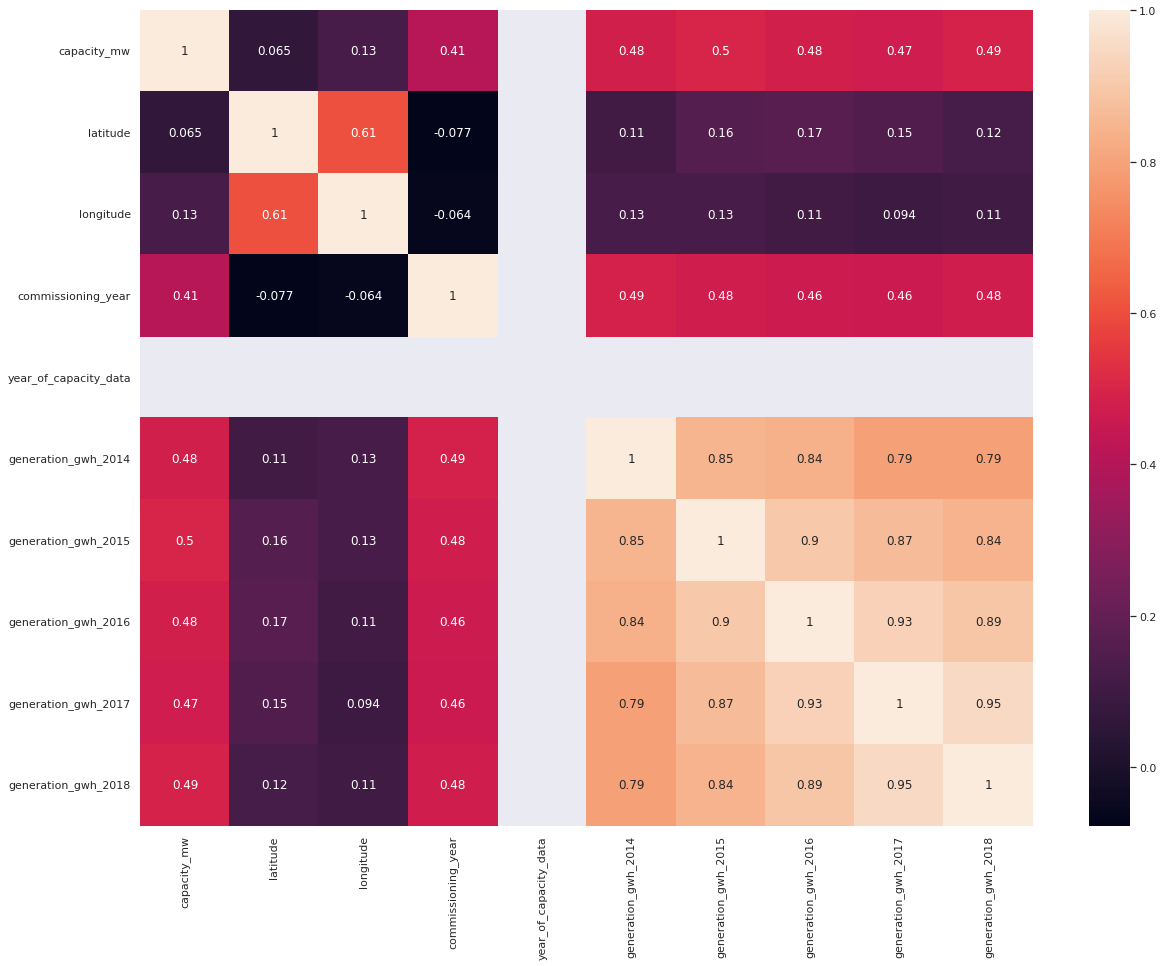

In [ ]:
#plotting heatmap to check the correlation of continuous data columns
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [ ]:
#dropping the year of capacity data it has zero relation with the data

df=df.drop(['year_of_capacity_data'],axis=1)

In [ ]:
df.shape

(662, 18)

In [ ]:
##dropping the  country is has zero relation with the data
df=df.drop(['country'], axis=1)

In [ ]:
df.shape

(662, 17)

In [ ]:
df.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'commissioning_year', 'owner', 'source',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_data_source'],
      dtype='object')

In [ ]:
df=df.drop(['name'], axis=1)

**Encoding the data**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
df['gppd_idnr']=le.fit_transform(df['gppd_idnr'])
df['primary_fuel']=le.fit_transform(df['primary_fuel'].values)
df['other_fuel1']=le.fit_transform(df['other_fuel1'])
df['geolocation_source']=le.fit_transform(df['geolocation_source'])
df['generation_data_source']=le.fit_transform(df['generation_data_source'])


In [ ]:
df.head()

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,414,2.5,28.1839,73.2407,6,2,2011.0,Solar Paces,National Renewable Energy Laboratory,1,0.00000,0.0000,0.00000,0.0000,0.00000,1
1,276,98.0,24.7663,74.6090,1,2,0.0,Ultratech Cement ltd,Ultratech Cement ltd,2,0.00000,0.0000,0.00000,0.0000,0.00000,1
2,609,39.2,21.9038,69.3732,7,2,0.0,AES,CDM,2,0.00000,0.0000,0.00000,0.0000,0.00000,1
5,0,250.0,23.7689,68.6447,1,1,2005.0,Govt,Central Electricity Authority,2,1153.42100,1208.8520,1175.76500,1147.9130,976.65500,0
6,1,60.0,10.4547,77.0078,3,2,1970.0,Govt,Central Electricity Authority,2,157.55825,152.1952,61.42135,89.6296,48.32715,0


In [ ]:
#droping the columns as it has zero relation with the data

df=df.drop(['gppd_idnr','owner','source'],axis=1)

In [ ]:
df.shape

(662, 13)

In [ ]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,6,2,2011.0,1,0.00000,0.0000,0.00000,0.0000,0.00000,1
1,98.0,24.7663,74.6090,1,2,0.0,2,0.00000,0.0000,0.00000,0.0000,0.00000,1
2,39.2,21.9038,69.3732,7,2,0.0,2,0.00000,0.0000,0.00000,0.0000,0.00000,1
5,250.0,23.7689,68.6447,1,1,2005.0,2,1153.42100,1208.8520,1175.76500,1147.9130,976.65500,0
6,60.0,10.4547,77.0078,3,2,1970.0,2,157.55825,152.1952,61.42135,89.6296,48.32715,0


In [ ]:
#dividing the data into features and target
X=df.drop(['primary_fuel'],axis=1)
y=df['primary_fuel']

In [ ]:
#checking the correlation of the data
df.corr()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
capacity_mw,1.000000,0.064777,0.126629,-0.267347,-0.351178,0.410065,0.222327,0.481643,0.500711,0.478670,0.472083,0.493367,-0.547804
latitude,0.064777,1.000000,0.607275,-0.027534,-0.010157,-0.077392,-0.288373,0.111229,0.159674,0.172498,0.146803,0.121260,-0.030678
longitude,0.126629,0.607275,1.000000,-0.149172,-0.003552,-0.064144,-0.081821,0.127037,0.127817,0.110721,0.093677,0.107696,-0.110987
primary_fuel,-0.267347,-0.027534,-0.149172,1.000000,0.234281,-0.351911,-0.446154,-0.207097,-0.216203,-0.210682,-0.211567,-0.215004,0.331256
other_fuel1,-0.351178,-0.010157,-0.003552,0.234281,1.000000,-0.285485,-0.115657,-0.192941,-0.164994,-0.166541,-0.176412,-0.164671,0.357526
commissioning_year,0.410065,-0.077392,-0.064144,-0.351911,-0.285485,1.000000,0.393824,0.487311,0.476780,0.464056,0.459084,0.476856,-0.789599
geolocation_source,0.222327,-0.288373,-0.081821,-0.446154,-0.115657,0.393824,1.000000,0.199954,0.195335,0.189927,0.187974,0.195273,-0.323493
generation_gwh_2014,0.481643,0.111229,0.127037,-0.207097,-0.192941,0.487311,0.199954,1.000000,0.845543,0.837977,0.790730,0.789783,-0.618109
generation_gwh_2015,0.500711,0.159674,0.127817,-0.216203,-0.164994,0.476780,0.195335,0.845543,1.000000,0.899014,0.869249,0.843854,-0.603830
generation_gwh_2016,0.478670,0.172498,0.110721,-0.210682,-0.166541,0.464056,0.189927,0.837977,0.899014,1.000000,0.926764,0.891548,-0.587111


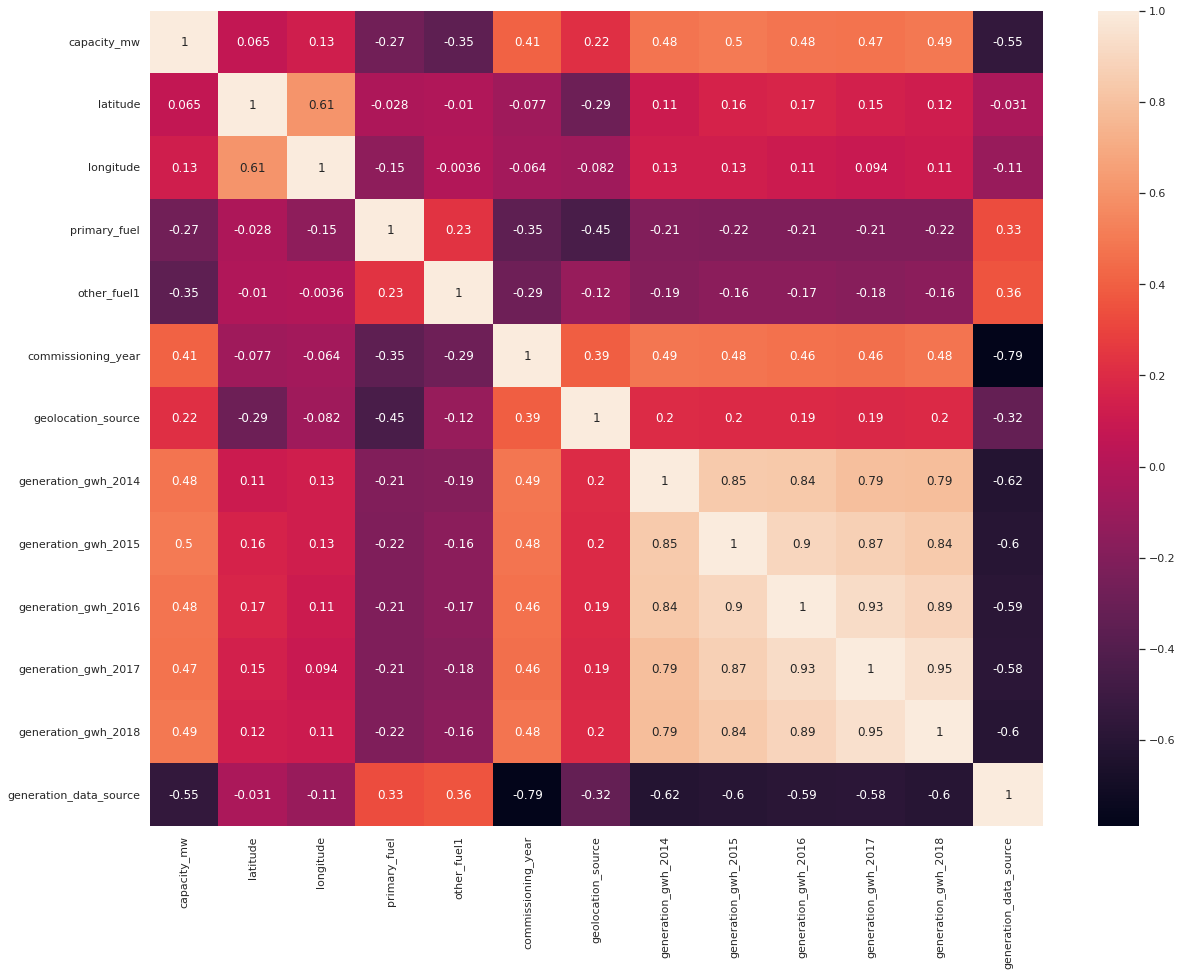

In [ ]:

plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

generation_data_source and other_fuel1 with the target variable(primary_fuel).

generation_gmh_2014,generation_gmh_2015,generation_gmh_2016,generation_gmh_2017,
generation_gmh_2018 are highly correlated to each other.

**Scaling the data**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
data=sc.fit_transform(X)

In [ ]:
x=pd.DataFrame(data,columns=X.columns)

#MODEL BUILDING

In [ ]:
#importing libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
dt=DecisionTreeClassifier()
lr=LogisticRegression()
knn=KNeighborsClassifier()
svc=SVC()
rf=RandomForestClassifier()

**LOGISTIC REGRESSION**

In [ ]:
for i in range(0,1000):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
  lr.fit(x_train,y_train)
  pred_train=lr.predict(x_train)
  pred_test=lr.predict(x_test)
  if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
    print('At random state',i,'the model performs well')
    print('At random state',i)
    print('Training accuracy of data is :-',accuracy_score(y_train,pred_train)*100)
    print('Testing accuracy of data is :-',accuracy_score(y_test,pred_test)*100)
    print('\n')

At random state 275 the model performs well
At random state 275
Training accuracy of data is :- 75.23629489603024
Testing accuracy of data is :- 75.18796992481202


At random state 429 the model performs well
At random state 429
Training accuracy of data is :- 75.23629489603024
Testing accuracy of data is :- 75.18796992481202


At random state 778 the model performs well
At random state 778
Training accuracy of data is :- 75.23629489603024
Testing accuracy of data is :- 75.18796992481202


At random state 868 the model performs well
At random state 868
Training accuracy of data is :- 75.23629489603024
Testing accuracy of data is :- 75.18796992481202


At random state 871 the model performs well
At random state 871
Training accuracy of data is :- 75.23629489603024
Testing accuracy of data is :- 75.18796992481202


At random state 917 the model performs well
At random state 917
Training accuracy of data is :- 75.23629489603024
Testing accuracy of data is :- 75.18796992481202




In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=166)

In [ ]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.09      0.14      0.11        14
           2       0.00      0.00      0.00        14
           3       0.33      0.31      0.32        42
           5       0.00      0.00      0.00         7
           6       0.22      0.19      0.20        26
           7       0.25      0.50      0.33        22

    accuracy                           0.23       133
   macro avg       0.13      0.16      0.14       133
weighted avg       0.20      0.23      0.21       133



CROSS-VALIDATION (LOGISTIC REGRESSION)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
pred_lr=lr.predict(x_test)

lss=accuracy_score(y_test,pred_lr)
for j in range(2,10):
  lsscore=cross_val_score(lr,x,y,cv=j)
  lsc=lsscore.mean()
  print('At cv:-',j)
  print('cross validation score is :-',lsc*100)
  print('accuracy score is:-',lss*100)
  print('\n')

At cv:- 2
cross validation score is :- 70.0906344410876
accuracy score is:- 76.69172932330827


At cv:- 3
cross validation score is :- 72.20828191416427
accuracy score is:- 76.69172932330827


At cv:- 4
cross validation score is :- 72.66429353778751
accuracy score is:- 76.69172932330827


At cv:- 5
cross validation score is :- 72.81157439052176
accuracy score is:- 76.69172932330827


At cv:- 6
cross validation score is :- 73.4165984165984
accuracy score is:- 76.69172932330827


At cv:- 7
cross validation score is :- 73.57382818749
accuracy score is:- 76.69172932330827


At cv:- 8
cross validation score is :- 73.72538936232735
accuracy score is:- 76.69172932330827


At cv:- 9
cross validation score is :- 73.11489571763545
accuracy score is:- 76.69172932330827




In [ ]:
lsscore_selected=cross_val_score(lr,x,y,cv=7).mean()
print('The cv score is ',lsscore_selected*100, '\n the accuracy score is ',lss*100)

The cv score is  73.57382818749 
 the accuracy score is  76.69172932330827


HYPER PARAMETER TUNING(LOGISTIC REGRESSION)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','liblinear','saga'],
    'max_iter' : [100, 1000]
    }
]

In [ ]:
grid=GridSearchCV(lr,param_grid=param_grid,cv=7,scoring='accuracy')

grid.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=LogisticRegression(),
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000],
                          'penalty': ['l1', 'l2', 'elasticnet'],
                          'solver': ['lbfgs', 'liblinear', 'saga']}],
             scoring='accuracy')

In [ ]:
print('best_params =>',grid.best_params_)

best_params => {'C': 206.913808111479, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
lr=grid.best_estimator_

In [ ]:
lr.fit(x_train,y_train)

LogisticRegression(C=206.913808111479, penalty='l1', solver='liblinear')

In [ ]:
lr_train_pred=lr.predict(x_train)

In [ ]:
lr_test_pred=lr.predict(x_test)

In [ ]:
print(classification_report(y_test,lr_test_pred))

              precision    recall  f1-score   support

           0       0.33      0.12      0.18         8
           1       0.73      0.79      0.76        14
           2       1.00      0.14      0.25        14
           3       0.78      1.00      0.88        42
           5       0.00      0.00      0.00         7
           6       1.00      1.00      1.00        26
           7       0.67      1.00      0.80        22

    accuracy                           0.78       133
   macro avg       0.64      0.58      0.55       133
weighted avg       0.75      0.78      0.72       133



DECISION TREE CLASSIFIER

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dt_train_pred=dt.predict(x_train)

In [ ]:
dt_test_pred=dt.predict(x_test)

In [ ]:
print(classification_report(y_train,dt_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        87
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00       152
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00       100
           7       1.00      1.00      1.00       101

    accuracy                           1.00       529
   macro avg       1.00      1.00      1.00       529
weighted avg       1.00      1.00      1.00       529



In [ ]:
print(classification_report(y_test,dt_test_pred))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         8
           1       0.53      0.71      0.61        14
           2       0.56      0.36      0.43        14
           3       0.87      0.98      0.92        42
           4       0.00      0.00      0.00         0
           5       0.50      0.29      0.36         7
           6       1.00      1.00      1.00        26
           7       0.94      0.73      0.82        22

    accuracy                           0.80       133
   macro avg       0.62      0.60      0.60       133
weighted avg       0.80      0.80      0.79       133



RANDOM FOREST CLASSIFIER

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
rf_train_pred=rf.predict(x_train)

In [ ]:
rf_test_pred=rf.predict(x_test)

In [ ]:
print(classification_report(y_train,rf_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        87
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00       152
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00       100
           7       1.00      1.00      1.00       101

    accuracy                           1.00       529
   macro avg       1.00      1.00      1.00       529
weighted avg       1.00      1.00      1.00       529



In [ ]:
print(classification_report(y_test,rf_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.71      0.86      0.77        14
           2       0.43      0.21      0.29        14
           3       0.82      1.00      0.90        42
           5       0.50      0.14      0.22         7
           6       1.00      1.00      1.00        26
           7       0.95      0.91      0.93        22

    accuracy                           0.83       133
   macro avg       0.74      0.71      0.71       133
weighted avg       0.81      0.83      0.81       133



KNNEIGHBORS CLASSIFIER

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
knn_train_pred=knn.predict(x_train)

In [ ]:
knn_test_pred=knn.predict(x_test)

In [ ]:
print(classification_report(y_train,knn_train_pred))

              precision    recall  f1-score   support

           0       0.69      0.86      0.77        42
           1       0.81      0.89      0.85        87
           2       0.79      0.45      0.58        33
           3       0.91      0.99      0.95       152
           4       0.00      0.00      0.00         1
           5       0.55      0.46      0.50        13
           6       1.00      0.98      0.99       100
           7       0.96      0.84      0.89       101

    accuracy                           0.88       529
   macro avg       0.71      0.68      0.69       529
weighted avg       0.88      0.88      0.88       529



In [ ]:
print(classification_report(y_test,knn_test_pred))

              precision    recall  f1-score   support

           0       0.57      0.50      0.53         8
           1       0.71      0.71      0.71        14
           2       0.50      0.21      0.30        14
           3       0.77      0.98      0.86        42
           5       0.00      0.00      0.00         7
           6       1.00      1.00      1.00        26
           7       0.77      0.91      0.83        22

    accuracy                           0.78       133
   macro avg       0.62      0.62      0.61       133
weighted avg       0.73      0.78      0.74       133



SVC

In [ ]:
svc.fit(x_train,y_train)

SVC()

In [ ]:
svc_train_pred=svc.predict(x_train)

In [ ]:
svc_test_pred=svc.predict(x_test)

In [ ]:
print(classification_report(y_train,svc_train_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.91      0.49      0.64        87
           2       1.00      0.36      0.53        33
           3       0.88      1.00      0.94       152
           4       0.00      0.00      0.00         1
           5       1.00      0.08      0.14        13
           6       1.00      0.96      0.98       100
           7       0.51      1.00      0.67       101

    accuracy                           0.77       529
   macro avg       0.66      0.49      0.49       529
weighted avg       0.78      0.77      0.72       529



In [ ]:
print(classification_report(y_test,svc_test_pred)) 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.58      0.50      0.54        14
           2       1.00      0.14      0.25        14
           3       0.79      1.00      0.88        42
           5       0.00      0.00      0.00         7
           6       1.00      1.00      1.00        26
           7       0.55      1.00      0.71        22

    accuracy                           0.74       133
   macro avg       0.56      0.52      0.48       133
weighted avg       0.70      0.74      0.68       133



CROSS VALIDATION(RANDOM FOREST CLASSIFIER)

In [ ]:
pred_rf=rf.predict(x_test)

lss=accuracy_score(y_test,pred_rf)
for j in range(2,10):
  lsscore=cross_val_score(rf,x,y,cv=j)
  lsc=lsscore.mean()
  print('At cv:-',j)
  print('cross validation score is :-',lsc*100)
  print('accuracy score is:-',lss*100)
  print('\n')

At cv:- 2
cross validation score is :- 85.1963746223565
accuracy score is:- 83.45864661654136


At cv:- 3
cross validation score is :- 85.351707116413
accuracy score is:- 83.45864661654136


At cv:- 4
cross validation score is :- 86.55987586710478
accuracy score is:- 83.45864661654136


At cv:- 5
cross validation score is :- 87.47095010252905
accuracy score is:- 83.45864661654136


At cv:- 6
cross validation score is :- 87.31913731913733
accuracy score is:- 83.45864661654136


At cv:- 7
cross validation score is :- 86.85490321548552
accuracy score is:- 83.45864661654136


At cv:- 8
cross validation score is :- 86.87187775492214
accuracy score is:- 83.45864661654136


At cv:- 9
cross validation score is :- 86.5605331358756
accuracy score is:- 83.45864661654136




In [ ]:
lsscore_selected=cross_val_score(rf,X,y,cv=3).mean()
print('The cv score is ',lsscore_selected*100, '\n the accuracy score is ',lss*100)

The cv score is  85.80213903743315 
 the accuracy score is  83.45864661654136


HYPER PARAMETER TUNING(RANDOM FOREST CLASSIFIER)

In [ ]:
parameters={'n_estimators':range(2,6),
            'criterion':['entropy','gini'],
            'max_depth':range(2,10),
            'min_samples_split': range(2,10),
            'min_samples_leaf':range(2,10)}

In [ ]:
grid=GridSearchCV(rf,param_grid=parameters,cv=3,scoring='accuracy')

grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': range(2, 6)},
             scoring='accuracy')

In [ ]:
print('best_params =>',grid.best_params_)

best_params => {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 4}


In [ ]:
rf=grid.best_estimator_

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_leaf=5,
                       min_samples_split=4, n_estimators=4)

In [ ]:
rf_train_pred=rf.predict(x_train)

In [ ]:
rf_test_pred=rf.predict(x_test)

In [ ]:
print(classification_report(y_test,rf_test_pred))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.50      0.71      0.59        14
           2       1.00      0.21      0.35        14
           3       0.78      1.00      0.88        42
           5       1.00      0.14      0.25         7
           6       0.90      1.00      0.95        26
           7       0.76      0.59      0.67        22

    accuracy                           0.76       133
   macro avg       0.80      0.63      0.63       133
weighted avg       0.80      0.76      0.73       133



#loading the model

In [ ]:
import joblib

In [ ]:
joblib.dump(rf,'global_power_primary_fuel.obj')

['global_power_primary_fuel.obj']

In [ ]:
model=joblib.load('global_power_primary_fuel.obj')

In [ ]:
result=model.predict(x_test)

In [ ]:
accuracy_score(y_test,result)

0.7593984962406015

In [ ]:
predicted_values=pd.DataFrame({'Actual':y_test,'Predicted':result})

In [ ]:
predicted_values

,Actual,Predicted
322,2,3
111,6,6
569,5,3
257,0,0
140,1,1
...,...,...
715,1,1
784,3,3
413,7,7
358,2,1
